1.Import Necessary Libraries

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from collections import Counter
import os
#Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
#Set plotting style
plt.style.use('ggplot')
sns.set_palette("husl")

2.Load CIFAR-10 Dataset

In [4]:
# Load CIFAR-10 dataset
print("Loading CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Print dataset shape
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 117s 1us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


3. Dataset Information

In [5]:
# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

print("CIFAR-10 Class Names:")
for i, name in enumerate(class_names):
    print(f"{i}: {name}")

# Data type information
print(f"\nData type: {x_train.dtype}")
print(f"Pixel value range: [{x_train.min()}, {x_train.max()}]")

CIFAR-10 Class Names:
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck

Data type: uint8
Pixel value range: [0, 255]


4. Basic Statistical Analysis

In [9]:
# Calculate basic statistics
def print_dataset_stats(data, labels, dataset_name):
    print(f"\n{dataset_name} Statistics:")
    print(f"Number of samples: {len(data)}")
    print(f"Image shape: {data.shape[1:]}")
    print(f"Number of classes: {len(np.unique(labels))}")
    
    # Class distribution
    class_dist = Counter(labels.flatten())
    print("\nClass Distribution:")
    for class_id, count in class_dist.items():
        print(f"  {class_names[class_id]}: {count} samples ({count/len(labels)*100:.1f}%)")
    
    # Pixel statistics
    print(f"\nPixel Statistics:")
    print(f"  Mean: {data.mean():.3f}")
    print(f"  Std: {data.std():.3f}")
    print(f"  Min: {data.min()}")
    print(f"  Max: {data.max()}")

print_dataset_stats(x_train, y_train, "Training Set")
print_dataset_stats(x_test, y_test, "Test Set")


Training Set Statistics:
Number of samples: 50000
Image shape: (32, 32, 3)
Number of classes: 10

Class Distribution:
  frog: 5000 samples (10.0%)
  truck: 5000 samples (10.0%)
  deer: 5000 samples (10.0%)
  automobile: 5000 samples (10.0%)
  bird: 5000 samples (10.0%)
  horse: 5000 samples (10.0%)
  ship: 5000 samples (10.0%)
  cat: 5000 samples (10.0%)
  dog: 5000 samples (10.0%)
  airplane: 5000 samples (10.0%)

Pixel Statistics:
  Mean: 120.708
  Std: 64.150
  Min: 0
  Max: 255

Test Set Statistics:
Number of samples: 10000
Image shape: (32, 32, 3)
Number of classes: 10

Class Distribution:
  cat: 1000 samples (10.0%)
  ship: 1000 samples (10.0%)
  airplane: 1000 samples (10.0%)
  frog: 1000 samples (10.0%)
  automobile: 1000 samples (10.0%)
  truck: 1000 samples (10.0%)
  dog: 1000 samples (10.0%)
  horse: 1000 samples (10.0%)
  deer: 1000 samples (10.0%)
  bird: 1000 samples (10.0%)

Pixel Statistics:
  Mean: 121.529
  Std: 64.061
  Min: 0
  Max: 255


 5. Data Visualization

Sample Training Images:


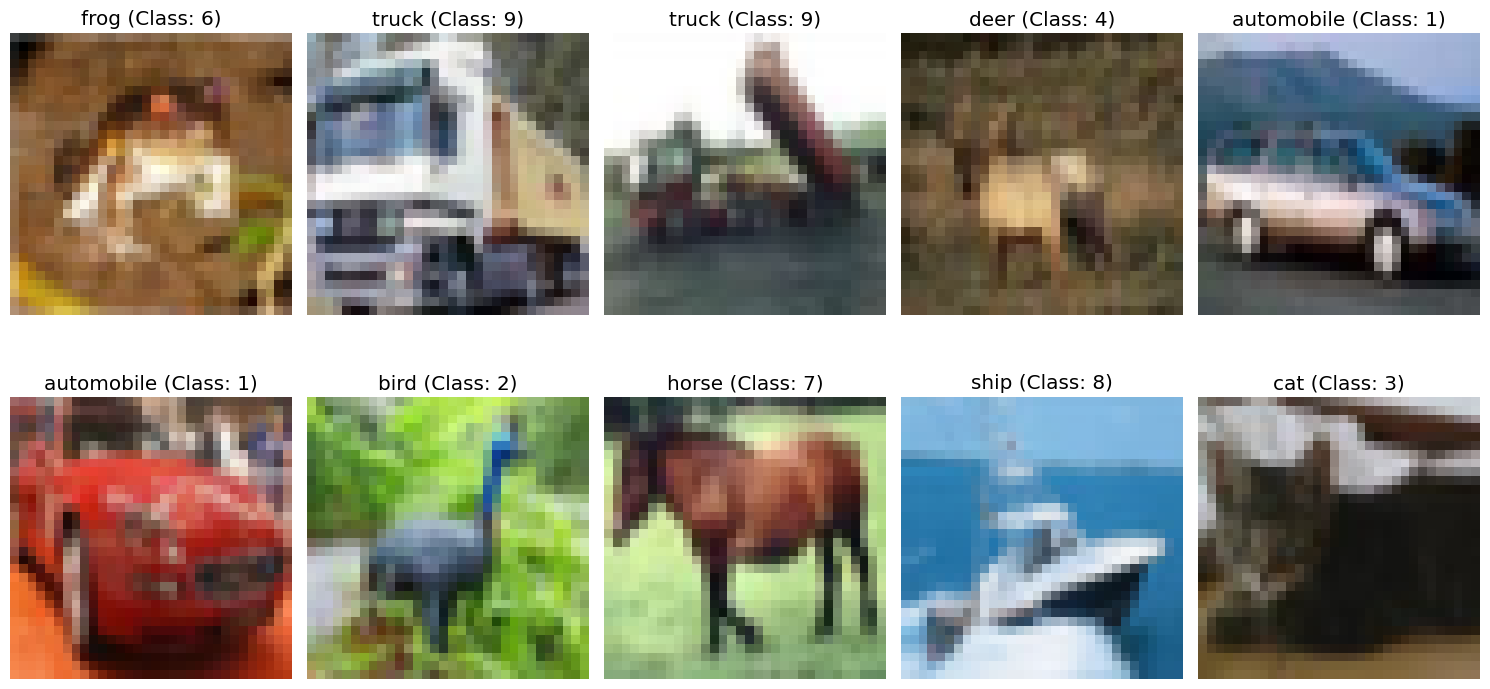

In [11]:
# Function to display sample images
def plot_sample_images(images, labels, class_names, num_samples=10):
    plt.figure(figsize=(15, 8))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f'{class_names[labels[i][0]]} (Class: {labels[i][0]})')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
# Plot sample training images
print("Sample Training Images:")
plot_sample_images(x_train, y_train, class_names)

6. Class Distribution Visualization

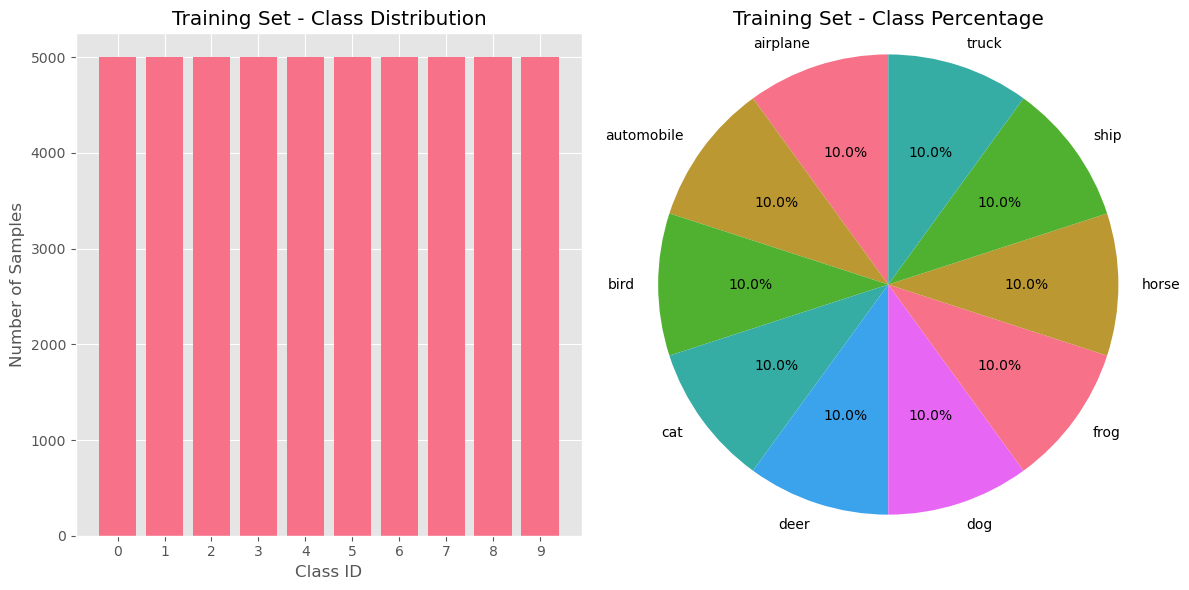

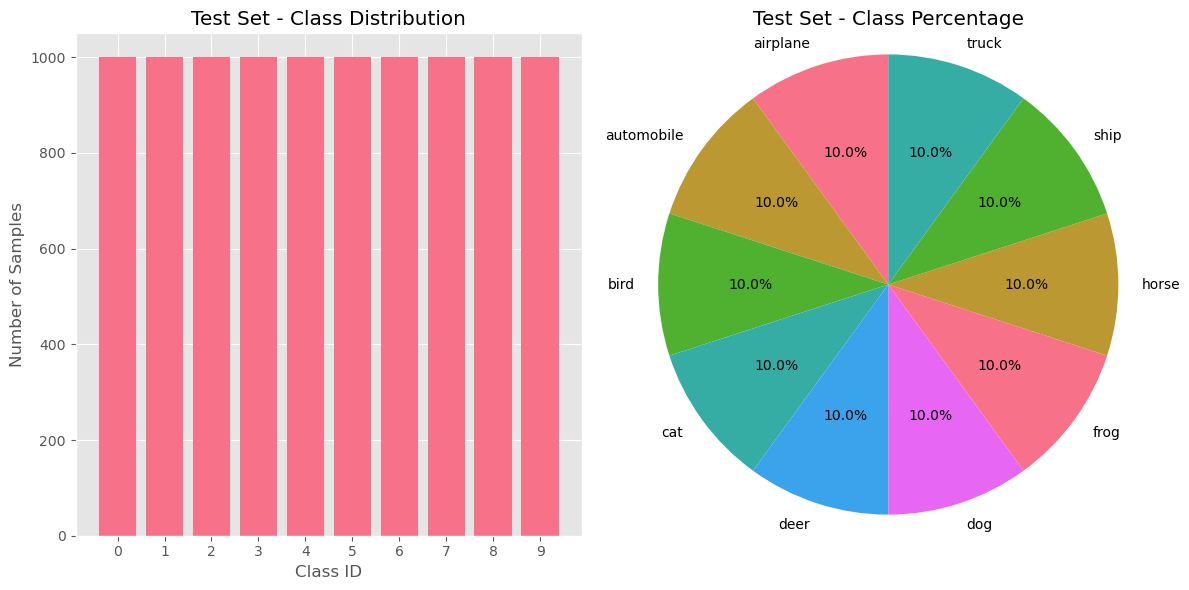

In [13]:
# Plot class distribution
def plot_class_distribution(labels, class_names, title):
    plt.figure(figsize=(12, 6))
    class_counts = Counter(labels.flatten())
    
    plt.subplot(1, 2, 1)
    bars = plt.bar(range(len(class_names)), [class_counts[i] for i in range(len(class_names))])
    plt.xlabel('Class ID')
    plt.ylabel('Number of Samples')
    plt.title(f'{title} - Class Distribution')
    plt.xticks(range(len(class_names)), range(len(class_names)))
    
    plt.subplot(1, 2, 2)
    plt.pie([class_counts[i] for i in range(len(class_names))], 
            labels=class_names, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title(f'{title} - Class Percentage')
    
    plt.tight_layout()
    plt.show()

plot_class_distribution(y_train, class_names, "Training Set")
plot_class_distribution(y_test, class_names, "Test Set")

7. Pixel Value Analysis

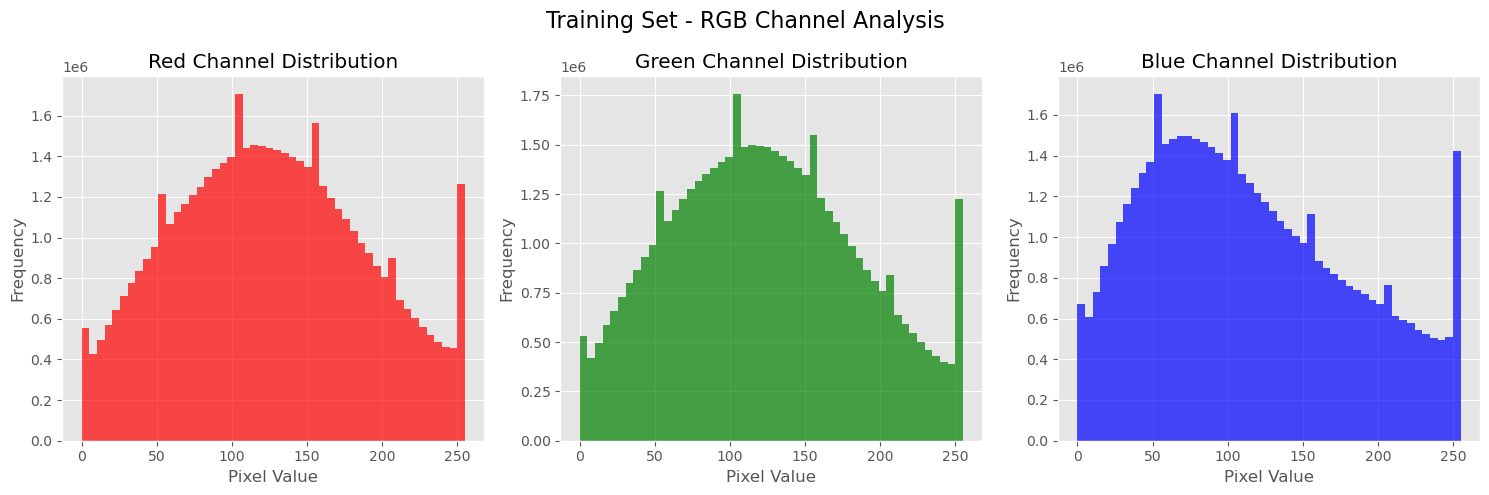


Training Set Channel Statistics:
  Red: Mean=125.31, Std=62.99
  Green: Mean=122.95, Std=62.09
  Blue: Mean=113.87, Std=66.70


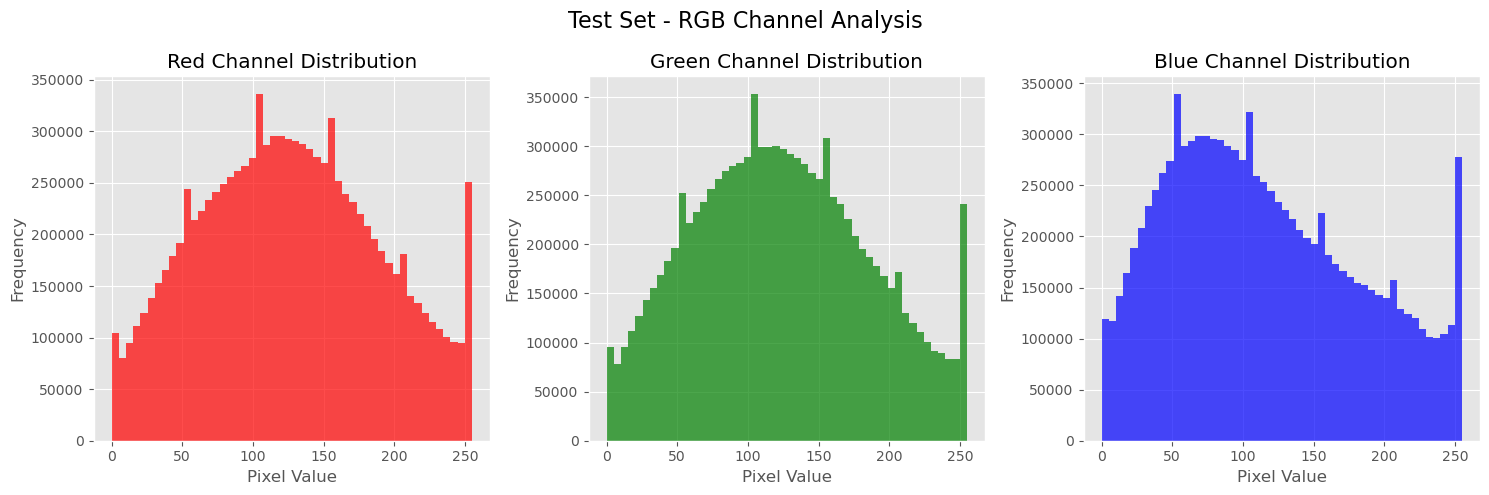


Test Set Channel Statistics:
  Red: Mean=126.02, Std=62.90
  Green: Mean=123.71, Std=61.94
  Blue: Mean=114.85, Std=66.71


In [14]:
# Analyze pixel values
def analyze_pixel_values(images, title):
    plt.figure(figsize=(15, 5))
    
    # Flatten all images
    flattened_pixels = images.reshape(-1, 3)
    
    # Plot RGB channel distributions
    colors = ['red', 'green', 'blue']
    channel_names = ['Red', 'Green', 'Blue']
    
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.hist(flattened_pixels[:, i], bins=50, color=colors[i], alpha=0.7)
        plt.title(f'{channel_names[i]} Channel Distribution')
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')
    
    plt.suptitle(f'{title} - RGB Channel Analysis', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Print channel statistics
    print(f"\n{title} Channel Statistics:")
    for i, channel in enumerate(['Red', 'Green', 'Blue']):
        print(f"  {channel}: Mean={flattened_pixels[:, i].mean():.2f}, "
              f"Std={flattened_pixels[:, i].std():.2f}")

analyze_pixel_values(x_train, "Training Set")
analyze_pixel_values(x_test, "Test Set")


In [ ]:
8. Data Splitting for Validation

In [15]:
# Split training data into training and validation sets
print("Splitting training data into training and validation sets...")
x_train_final, x_val, y_train_final, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print(f"Final Training set: {x_train_final.shape}")
print(f"Validation set: {x_val.shape}")
print(f"Test set: {x_test.shape}")

# Verify class distribution in validation set
val_class_dist = Counter(y_val.flatten())
print("\nValidation Set Class Distribution:")
for class_id, count in val_class_dist.items():
    print(f"  {class_names[class_id]}: {count} samples")

Splitting training data into training and validation sets...
Final Training set: (40000, 32, 32, 3)
Validation set: (10000, 32, 32, 3)
Test set: (10000, 32, 32, 3)

Validation Set Class Distribution:
  bird: 1000 samples
  horse: 1000 samples
  automobile: 1000 samples
  truck: 1000 samples
  frog: 1000 samples
  ship: 1000 samples
  airplane: 1000 samples
  cat: 1000 samples
  dog: 1000 samples
  deer: 1000 samples


9. Save Processed Data

In [17]:
# Create directory for processed data
os.makedirs('../data/processed', exist_ok=True)

# Save processed data
np.save('../data/processed/x_train.npy', x_train_final)
np.save('../data/processed/y_train.npy', y_train_final)
np.save('../data/processed/x_val.npy', x_val)
np.save('../data/processed/y_val.npy', y_val)
np.save('../data/processed/x_test.npy', x_test)
np.save('../data/processed/y_test.npy', y_test)

# Save class names
with open('../data/processed/class_names.txt', 'w') as f:
    for name in class_names:
        f.write(f"{name}\n")

print("Processed data saved successfully!")

Processed data saved successfully!


10. Summary Report

In [18]:
# Generate summary report
print("=" * 60)
print("DATA COLLECTION SUMMARY REPORT")
print("=" * 60)
print(f"Dataset: CIFAR-10")
print(f"Total classes: {len(class_names)}")
print(f"Original training samples: {len(x_train)}")
print(f"Final training samples: {len(x_train_final)}")
print(f"Validation samples: {len(x_val)}")
print(f"Test samples: {len(x_test)}")
print(f"Image shape: {x_train.shape[1:]}")
print(f"Data type: {x_train.dtype}")
print(f"Pixel value range: [0, 255]")
print("=" * 60)

DATA COLLECTION SUMMARY REPORT
Dataset: CIFAR-10
Total classes: 10
Original training samples: 50000
Final training samples: 40000
Validation samples: 10000
Test samples: 10000
Image shape: (32, 32, 3)
Data type: uint8
Pixel value range: [0, 255]
